### 1. 產生特徵向量函式庫 copy from notebook 1


In [1]:
import numpy as np
import cv2
import math
from scipy import ndimage
from matplotlib import pyplot as plt
import pandas as pd


isPlot=True
idDebug=True
STEP=1 #每次多少角度
granularity=int(180/STEP)

def imgWrapA(orgImg,a):
    img_a = ndimage.rotate(orgImg, a, reshape=False)    
    return img_a
        
def test_gen(a, x,y,wh):
    bigMap="img/map_2d.png"
    orgImg = cv2.cvtColor(cv2.imread(bigMap), cv2.COLOR_BGR2RGB)
    #print('orgImg shape=',orgImg.shape)

    #Question

    orgImg_crop128=orgImg[y-wh: y + wh, x-wh: x + wh ]
    if isPlot: plt.imshow(orgImg_crop128)
    orgImg_crop128_a33=imgWrapA(orgImg_crop128,a)
    #print('imgWrapA shape=',orgImg_crop128_a33.shape)
    orgImg_crop128_a33_crop=orgImg_crop128_a33[int(wh/4): int(7*wh/4), int(wh/4): int(7*wh/4)]

    return orgImg_crop128_a33_crop



def getImgThreshold(img):
    s = img.flatten()
    s_len= len(s)
    s_len_3q=int(s_len*0.75)
    s_order=np.sort(s)
    if idDebug:
        print('s_len=',s_len)
        print('s_order[s_len_3q]=',s_order[s_len_3q])

    if isPlot:
        plt.plot(s_order)
    return s_order[s_len_3q]
    
    

def sizeStatistic(img, type=0):
    imgThreshold=getImgThreshold(img)
    print("imgThreshold:",imgThreshold)
    bigger=img>imgThreshold
    print(img.shape)
    print(bigger.shape)
    plt.imshow(bigger)
    bigger_tmp=bigger[0:26,6:26]
    bigger_tmp_2=bigger[0:26,7:27]
    sizeStatistic_result=np.zeros(8)
    for i in range(6):
        if type==0:
            bigger_tmp=np.logical_and(bigger_tmp ,bigger[i:26+i,6:26])
        elif type==1:
            bigger_tmp=np.logical_and(bigger_tmp ,bigger[0:26,6+i:26+i])
        elif type==2:
            bigger_tmp=np.logical_and(bigger_tmp ,bigger[0+i:26+i,6+i:26+i])
            bigger_tmp_2=np.logical_and(bigger_tmp_2 ,bigger[0+i:26+i,7+i:27+i])
        elif type==3:
            bigger_tmp=np.logical_and(bigger_tmp ,bigger[0+i:26+i,6-i:26-i])
            bigger_tmp_2=np.logical_and(bigger_tmp_2 ,bigger[0+i:26+i,7-i:27-i])

        sizeStatistic_result[i]=sum(sum(bigger_tmp))
        if type in [2,3]:  sizeStatistic_result[i] += sum(sum(bigger_tmp_2))
        if sizeStatistic_result[i]==0: break
    return sizeStatistic_result

def getFeature(sizeStatisticResult):
    s_result_diff=np.abs(np.diff(sizeStatisticResult[0:7]))
    s_result_diff_norm=s_result_diff/sum(s_result_diff)
    s_result_all=s_result_diff_norm#計算差值 加上normilize
    s_result_all=s_result_all+1 #避免出現 1, 準備log
    s_result_all=np.log(s_result_all)#log
    s_result_all=np.around(s_result_all, decimals=4)
    return s_result_all

#由圖檔得特徵向量，未知旋轉角度，應用時候可採用   
def getFeatures(monoImg):
    Features=np.zeros(24)
    for i in range(4):
        sizeStatisticResult=sizeStatistic(monoImg, i) 
        #print(i,sizeStatisticResult)
        Features[i*6:6+i*6]=getFeature(sizeStatisticResult)
    return Features

def getYandFeatures(a, monoImg):
    s_result_all=np.zeros(1+24)
    s_result_all[0]=a
    s_result_all[1:25]=getFeatures(monoImg)
    return s_result_all

#給定座標及轉角 可以得到一個特徵向量    
def genFeatureVector(a,x,y):
    challenge=test_gen(a,x,y,64);
    s_result_all=getYandFeatures(a, challenge[:,:,2])

    return s_result_all



### 2. 生成測試數據

challenge.shape= (60, 60)


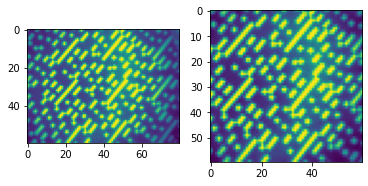

In [2]:

x=40
y=30
wh=30
scale_percent = 25 # percent of original size

#challenge=test_gen(a,x,y,wh)
pixart7920_img="img/2023_1_12_16_29_39_Image.bmp"
pixart7920_img="img/2023_1_16_11_43_43_Image.bmp"
pixart7920_img="img/2023_1_16_11_43_53_Image.bmp"
orgImg = cv2.cvtColor(cv2.imread(pixart7920_img), cv2.COLOR_BGR2GRAY)


width = int(orgImg.shape[1] * scale_percent / 100)
height = int(orgImg.shape[0] * scale_percent / 100)
dim = (width, height)
resized = cv2.resize(orgImg, dim, interpolation = cv2.INTER_AREA)
challenge=resized[y-wh: y + wh, x-wh: x + wh ]
if idDebug: 
    print('challenge.shape=',challenge.shape)
if isPlot:
    plt.subplots(1,2,figsize=(6,3)) 
    plt.subplot(121)
    plt.imshow(resized)
    plt.subplot(122)
    plt.imshow(challenge)


### 3. 生成特徵向量

s_len= 3600
s_order[s_len_3q]= 195
imgThreshold: 195
(60, 60)
(60, 60)
s_len= 3600
s_order[s_len_3q]= 195
imgThreshold: 195
(60, 60)
(60, 60)
s_len= 3600
s_order[s_len_3q]= 195
imgThreshold: 195
(60, 60)
(60, 60)
s_len= 3600
s_order[s_len_3q]= 195
imgThreshold: 195
(60, 60)
(60, 60)
[0.3665 0.2953 0.1682 0.0152 0.0152 0.     0.3978 0.3178 0.1084 0.0152
 0.0076 0.     0.5704 0.2017 0.0075 0.     0.     0.     0.3294 0.2412
 0.1345 0.0624 0.0225 0.1008]
[0.2017 0.0075 0.     0.     0.     0.2412 0.1345 0.0624 0.0225 0.1008]
[0.2953 0.1682 0.0152 0.0152 0.     0.3178 0.1084 0.0152 0.0076 0.    ]


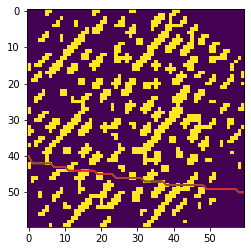

In [3]:
s_result_all=getFeatures(challenge)
X_test_sin=s_result_all[[13,14,15,16,17,19,20,21,22,23]]
X_test_cos=s_result_all[[1,2,3,4,5,7,8,9,10,11]]

if idDebug:
    print(s_result_all)
    print(X_test_sin)
    print(X_test_cos)

### 4. 載入模型

In [4]:
import pickle

# load the trained decision tree classifier from Pickle
decision_tree_pkl_filename1 = 'decision_tree_1.pkl'
# Open the file to load as pkl file
with open(file=decision_tree_pkl_filename1, mode='rb') as f:
    regr1=pickle.load(f)
2# load the trained decision tree classifier from Pickle
decision_tree_pkl_filename2 = 'decision_tree_2.pkl'
# Open the file to load as pkl file
with open(file=decision_tree_pkl_filename2, mode='rb') as f:
    regr2=pickle.load(f)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.24.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


### 5. 計算sin cos旋轉角度

In [5]:
regr_y_result1 = regr1.predict(X_test_cos.reshape(1, -1))
regr_y_result2 = regr2.predict(X_test_sin.reshape(1, -1))

if idDebug: 
    print(regr_y_result1)
    print(regr_y_result2)


[-0.18457451]
[0.98328363]


### 6. 計算arctan旋轉角度

In [6]:

theta=np.arctan2(regr_y_result2,regr_y_result1)*90/np.pi
theta=theta[0]
if idDebug: 
    print(theta)


50.31570493251484


### 7.圖型轉正 

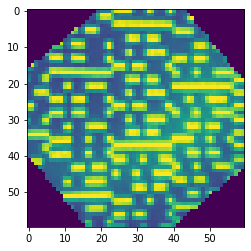

In [7]:
correct_challenge=imgWrapA(challenge,-theta)
#correct_challenge=correct_challenge[int(wh/4): int(5*wh/4), int(wh/4): int(5*wh/4)]
if isPlot:
    plt.imshow(correct_challenge)

### 8. 割取中心區42x42 pixels

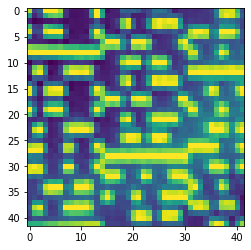

In [8]:
wh=correct_challenge.shape[0]
correct_challenge=correct_challenge[int(wh/2)-21: int(wh/2)+21, int(wh/2)-21: int(wh/2)+21]
if isPlot:
    plt.imshow(correct_challenge)

### 9. 偵測pilot

s_len= 1764
s_order[s_len_3q]= 208
v_sum= [1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 1 1 1 1 1 1 0 0 0 2]
h_sum= [0 0 0 0 0 0 0 0 5 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 7 0 0 0 0 0 0 0 0
 0 0 0 0 0]
v_i= 15
h_i= 27


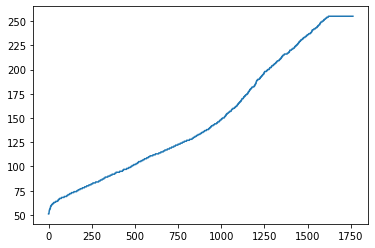

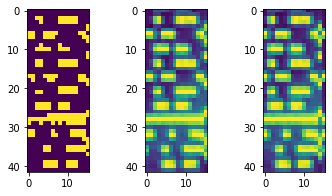

In [9]:



def pilotDetect(img):
    imgThreshold=getImgThreshold(img)
    bigger=img>imgThreshold

    deep=10
    w=img.shape[1]-deep
    bigger_tmp=bigger[:,0:w]


    for i in range(deep):
        bigger_tmp=np.logical_and(bigger_tmp ,bigger[:,i:w+i])

    #plt.imshow(bigger_tmp)
    v_sum=np.sum(bigger_tmp,axis=0)
    h_sum=np.sum(bigger_tmp,axis=1)
    
    h_i=np.argmax(h_sum)
    
    #先找到零的部分
    for v_i_start in range(len(v_sum)):
        if v_sum[v_i_start]==0: break
    #在找之後非零的部分
    for v_i in range(v_i_start,len(v_sum)):
        if v_sum[v_i]>0: break
    if idDebug:
        print('v_sum=',v_sum)
        print('h_sum=',h_sum)
        print("v_i=",v_i)
        print("h_i=",h_i)
        
    if isPlot:
        plt.subplots(1,3,figsize=(6,3)) 
        plt.subplot(131)
        plt.imshow(bigger[:,v_i+1:v_i+16+1])
        plt.subplot(132)
        plt.imshow(img[:,v_i+1:v_i+16+1])        
        plt.subplot(133)
        plt.imshow(img[:,v_i+1:v_i+16+1])
    #return img[:,v_i+1:v_i+16+1]
    return v_i,h_i


v_i,h_i=pilotDetect(correct_challenge)
cropImg=correct_challenge[:,v_i+1:v_i+16+1]
cropImg_roll=np.roll(cropImg, -1, axis=1)
plt.imshow(cropImg_roll)

### 10. 峰值檢出

_peaks= [ 3  6 10 14 17 21 25 28 32 36 39]
mask= [ True  True  True  True  True  True  True False  True  True  True]
peaks= [ 3  6 10 14 17 21 25 32 36 39]


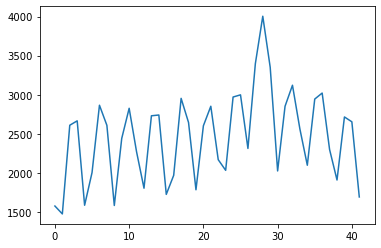

In [10]:
import scipy.signal
cropImg_roll_sum=np.sum(cropImg_roll,axis=1)
_peaks, _ = scipy.signal.find_peaks(np.sum(cropImg_roll,axis=1))
mask = np.invert(np.isin(_peaks, [h_i-1,h_i,h_i+1]))
peaks=_peaks[mask]
_zoom=_peaks[-1]-_peaks[0]
zoom=_zoom/(len(_peaks)-1)/4
wave_length=np.round(zoom*16)
wave_length

if isPlot:
    plt.plot(cropImg_roll_sum)
    
if idDebug:
    print("_peaks=",_peaks)
    print("mask=",mask)
    print("peaks=",peaks)

### 11. fft 變換

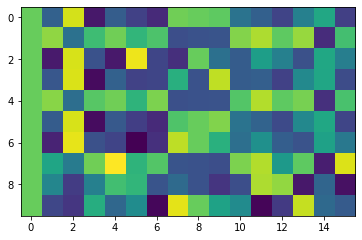

In [11]:
#print(int(v_i+wave_length+1))
#cropImg=correct_challenge[:,v_i+1:int(v_i+wave_length+1)]
#cropImg_roll=np.roll(cropImg, -1, axis=1)
plt.imshow(cropImg_roll)

cropImg_roll_fft=np.fft.fft(cropImg_roll[peaks])
cropImg_roll_fft_ang=np.arctan2(cropImg_roll_fft.real,cropImg_roll_fft.imag)*180/np.pi
if isPlot:
    plt.imshow(cropImg_roll_fft_ang)

###  12. 計算相位差及解碼

In [12]:

def find_phase_code(two_hz_angle_previous, two_hz_angle_next):
    two_hz_angle_diff=two_hz_angle_next-two_hz_angle_previous
    phase_code=np.round(two_hz_angle_diff/90)
    if phase_code < 0: phase_code+=4
    if phase_code > 4: phase_code-=4
    return phase_code

def find_type_code(one_hz_angle, two_hz_angle):
    hz_comparison = 2*one_hz_angle-two_hz_angle
    if hz_comparison < 0 : hz_comparison += 360
    elif hz_comparison > 360 : hz_comparison[i] -= 360;
    print('hz_comparison=',hz_comparison)
    phase_shift=np.round(hz_comparison/180)
    if phase_shift==1 or phase_shift==-1 : type_code = 1
    elif phase_shift==0 or phase_shift==2 : type_code = 0
    else : type_code=-1
    return type_code

def find_diff_type_code(one_hz_angle_previous, two_hz_angle_previous, one_hz_angle_next, two_hz_angle_next):
    hz_comparison_previous = 2*one_hz_angle_previous-two_hz_angle_previous
    hz_comparison_next = 2*one_hz_angle_next-two_hz_angle_next
    hz_comparison=hz_comparison_previous-hz_comparison_next
    if hz_comparison < 0 : hz_comparison += 360
    elif hz_comparison > 360 : hz_comparison -= 360;
    #print('hz_comparison=',hz_comparison)
    phase_shift=np.round(hz_comparison/180)
    if phase_shift==1 or phase_shift==-1 : type_code = 1
    elif phase_shift==0 or phase_shift==2 : type_code = 0
    else : type_code=-1
    return type_code

def read_code(one_hz_angle_previous, two_hz_angle_previous, one_hz_angle_next, two_hz_angle_next):   
    #print('one_hz_angle_previous=',one_hz_angle_previous)
    #print('two_hz_angle_previous=',two_hz_angle_previous)
    #print('one_hz_angle_next=',one_hz_angle_next)
    #print('two_hz_angle_next=',two_hz_angle_next)
    diff_type_code=find_diff_type_code(one_hz_angle_previous, two_hz_angle_previous, one_hz_angle_next, two_hz_angle_next)
    phase_code=find_phase_code(two_hz_angle_previous,two_hz_angle_next)
    code_read = int(2*phase_code+abs(diff_type_code))
    return code_read

for i in range(len(peaks)-1):
    print(read_code(cropImg_roll_fft_ang[i,1],cropImg_roll_fft_ang[i,2],cropImg_roll_fft_ang[i+1,1],cropImg_roll_fft_ang[i+1,2]))
    

5
4
1
5
5
1
5
6
1


In [13]:
prn_array = [0, 0, 0, 0, 1, 1, 1, 3, 3, 3, 4, 4, 4, 0, 0, 0, 5, 5, 5, 3, 3, 3, 0, 0, 1, 0, 0, 1, 3, 3, 2, 5, 5, 4, 0, 0, 1, 4, 4, 5, 3, 3, 2, 1, 1, 3, 2, 2, 4, 6, 6, 0, 3, 3, 5, 1, 1, 3, 6, 6, 0, 6, 6, 0, 7, 7, 0, 1, 1, 2, 4, 4, 7, 0, 0, 3, 7, 7, 0, 5, 5, 6, 4, 4, 7, 4, 4, 0, 1, 1, 5, 7, 7, 3, 4, 4, 0, 4, 4, 0, 5, 5, 1, 7, 7, 3, 0, 0, 5, 4, 4, 1, 3, 3, 6, 1, 1, 4, 0, 0, 5, 0, 0, 5, 3, 3, 6, 5, 5, 3, 2, 2, 0, 2, 2, 0, 3, 3, 1, 5, 5, 3, 6, 6, 4, 2, 2, 0, 7, 7, 4, 5, 5, 2, 4, 4, 3, 4, 4, 3, 7, 7, 4, 1, 1, 6, 4, 4, 3, 0, 1, 0, 1, 3, 2, 3, 4, 5, 4, 0, 1, 0, 5, 4, 5, 3, 2, 3, 0, 1, 3, 5, 4, 6, 1, 0, 2, 6, 7, 1, 4, 5, 7, 5, 4, 6, 5, 4, 7, 1, 0, 3, 4, 5, 6, 2, 3, 4, 1, 0, 3, 1, 0, 3, 0, 1, 5, 7, 6, 2, 5, 4, 0, 4, 5, 1, 4, 5, 1, 7, 6, 2, 1, 0, 5, 7, 6, 3, 4, 5, 0, 4, 5, 0, 5, 4, 1, 7, 6, 3, 0, 1, 7, 1, 0, 6, 1, 0, 6, 2, 3, 1, 4, 5, 3, 1, 0, 6, 5, 4, 3, 5, 4, 3, 4, 5, 2, 6, 7, 4, 1, 0, 7, 5, 4, 3, 0, 2, 4, 6, 1, 3, 5, 1, 3, 5, 0, 2, 4, 2, 4, 6, 5, 7, 0, 3, 5, 6, 2, 4, 7, 2, 4, 7, 5, 7, 0, 7, 1, 5, 6, 0, 4, 0, 2, 6, 3, 5, 1, 7, 1, 5, 2, 4, 1, 2, 4, 1, 5, 7, 2, 7, 1, 4, 2, 4, 1, 6, 0, 6, 1, 3, 1, 5, 7, 5, 0, 2, 0, 6, 0, 6, 5, 7, 4, 7, 1, 6, 2, 4, 3, 6, 0, 7, 5, 7, 4, 3, 4, 7, 0, 4, 7, 0, 5, 6, 1, 7, 0, 3, 0, 3, 7, 3, 4, 0, 5, 6, 2, 0, 3, 7, 4, 7, 2, 6, 1, 4, 1, 2, 7, 5, 6, 3, 0, 3, 1, 5, 6, 4, 1, 2, 0, 6, 1, 7, 4, 7, 4, 0, 3, 0, 5, 6, 5, 3, 4, 3, 0, 4, 0, 4, 1, 5, 1, 7, 3, 7, 4, 0, 5, 0, 4, 1, 7, 3, 6, 5, 1, 7, 2, 6, 4, 2, 6, 4, 3, 7, 4, 1, 5, 2, 0, 4, 3, 0, 5, 0, 5, 3, 6, 3, 0, 5, 3, 1, 4, 2, 1, 4, 3, 1, 4, 3, 0, 6, 4, 2, 1, 7, 4, 3]
abs_array = [0, 0, 0, 1, 0, 0, 2, 0, 0, 3, 0, 0, 4, 0, 0, 5, 0, 0, 6, 0, 0, 7, 0, 1, 1, 0, 1, 2, 0, 1, 3, 0, 1, 4, 0, 1, 5, 0, 1, 6, 0, 1, 7, 0, 2, 1, 0, 2, 2, 0, 2, 3, 0, 2, 4, 0, 2, 5, 0, 2, 6, 0, 2, 7, 0, 3, 1, 0, 3, 2, 0, 3, 3, 0, 3, 4, 0, 3, 5, 0, 3, 6, 0, 3, 7, 0, 4, 1, 0, 4, 2, 0, 4, 3, 0, 4, 4, 0, 4, 5, 0, 4, 6, 0, 4, 7, 0, 5, 1, 0, 5, 2, 0, 5, 3, 0, 5, 4, 0, 5, 5, 0, 5, 6, 0, 5, 7, 0, 6, 1, 0, 6, 2, 0, 6, 3, 0, 6, 4, 0, 6, 5, 0, 6, 6, 0, 6, 7, 0, 7, 1, 0, 7, 2, 0, 7, 3, 0, 7, 4, 0, 7, 5, 0, 7, 6, 0, 7, 7, 1, 1, 1, 2, 1, 1, 3, 1, 1, 4, 1, 1, 5, 1, 1, 6, 1, 1, 7, 1, 2, 2, 1, 2, 3, 1, 2, 4, 1, 2, 5, 1, 2, 6, 1, 2, 7, 1, 3, 2, 1, 3, 3, 1, 3, 4, 1, 3, 5, 1, 3, 6, 1, 3, 7, 1, 4, 2, 1, 4, 3, 1, 4, 4, 1, 4, 5, 1, 4, 6, 1, 4, 7, 1, 5, 2, 1, 5, 3, 1, 5, 4, 1, 5, 5, 1, 5, 6, 1, 5, 7, 1, 6, 2, 1, 6, 3, 1, 6, 4, 1, 6, 5, 1, 6, 6, 1, 6, 7, 1, 7, 2, 1, 7, 3, 1, 7, 4, 1, 7, 5, 1, 7, 6, 1, 7, 7, 2, 2, 2, 3, 2, 2, 4, 2, 2, 5, 2, 2, 6, 2, 2, 7, 2, 3, 3, 2, 3, 4, 2, 3, 5, 2, 3, 6, 2, 3, 7, 2, 4, 3, 2, 4, 4, 2, 4, 5, 2, 4, 6, 2, 4, 7, 2, 5, 3, 2, 5, 4, 2, 5, 5, 2, 5, 6, 2, 5, 7, 2, 6, 3, 2, 6, 4, 2, 6, 5, 2, 6, 6, 2, 6, 7, 2, 7, 3, 2, 7, 4, 2, 7, 5, 2, 7, 6, 2, 7, 7, 3, 3, 3, 4, 3, 3, 5, 3, 3, 6, 3, 3, 7, 3, 4, 4, 3, 4, 5, 3, 4, 6, 3, 4, 7, 3, 5, 4, 3, 5, 5, 3, 5, 6, 3, 5, 7, 3, 6, 4, 3, 6, 5, 3, 6, 6, 3, 6, 7, 3, 7, 4, 3, 7, 5, 3, 7, 6, 3, 7, 7, 4, 4, 4, 5, 4, 4, 6, 4, 4, 7, 4, 5, 5, 4, 5, 6, 4, 5, 7, 4, 6, 5, 4, 6, 6, 4, 6, 7, 4, 7, 5, 4, 7, 6, 4, 7, 7, 5, 5, 5, 6, 5, 5, 7, 5, 6, 6, 5, 6, 7, 5, 7, 6, 5, 7, 7, 6, 6, 6, 7, 6, 7, 7, 7];
